In [17]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

%matplotlib inline

In [18]:
# Read csv file as DataFrame, with the first column as row index
df_columbus = pd.read_csv("data/columbus.csv"
                )
# Preview the dataset
df_columbus.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,315532800,1980-01-01 00:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.70,2400.0,26.94,23.65,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
1,315536400,1980-01-01 01:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.57,NaN,26.82,24.13,...,NaN,NaN,NaN,NaN,NaN,78,803,Clouds,broken clouds,04n
2,315540000,1980-01-01 02:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.89,NaN,27.63,24.84,...,NaN,NaN,NaN,NaN,NaN,44,802,Clouds,scattered clouds,03n
3,315543600,1980-01-01 03:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.12,3200.0,27.32,22.96,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
4,315547200,1980-01-01 04:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.84,NaN,27.81,25.50,...,NaN,NaN,NaN,NaN,NaN,68,803,Clouds,broken clouds,04n


In [19]:
# function to convert unix timestamp to EST
def convert_to_est(timestamp):
    # Convert timestamp to datetime in UTC
    dt_utc = datetime.utcfromtimestamp(timestamp)
    
    # Specify the UTC timezone
    utc_timezone = pytz.timezone('UTC')
    
    # Localize the UTC datetime
    dt_utc = utc_timezone.localize(dt_utc)
    
    # Convert UTC datetime to Eastern Standard Time (EST)
    eastern_timezone = pytz.timezone('America/New_York')
    dt_est = dt_utc.astimezone(eastern_timezone)
    
    return dt_est

#create a column for EST
df_columbus['dt_est'] = df_columbus['dt'].apply(convert_to_est)

In [20]:
#set the index to EST
df_columbus.set_index('dt_est',inplace=True)

In [21]:
df_columbus.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_est,,,,,,,,,,,,,,,,,,,,,
1979-12-31 19:00:00-05:00,315532800,1980-01-01 00:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.70,2400.0,26.94,23.65,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
1979-12-31 20:00:00-05:00,315536400,1980-01-01 01:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.57,NaN,26.82,24.13,...,NaN,NaN,NaN,NaN,NaN,78,803,Clouds,broken clouds,04n
1979-12-31 21:00:00-05:00,315540000,1980-01-01 02:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.89,NaN,27.63,24.84,...,NaN,NaN,NaN,NaN,NaN,44,802,Clouds,scattered clouds,03n
1979-12-31 22:00:00-05:00,315543600,1980-01-01 03:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.12,3200.0,27.32,22.96,...,NaN,NaN,NaN,NaN,NaN,100,741,Fog,fog,50n
1979-12-31 23:00:00-05:00,315547200,1980-01-01 04:00:00 +0000 UTC,-18000,Columbus,39.961176,-82.998794,29.84,NaN,27.81,25.50,...,NaN,NaN,NaN,NaN,NaN,68,803,Clouds,broken clouds,04n


In [22]:
df_columbus.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 416153 entries, 1979-12-31 19:00:00-05:00 to 2024-01-01 18:00:00-05:00
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   416153 non-null  int64  
 1   dt_iso               416153 non-null  object 
 2   timezone             416153 non-null  int64  
 3   city_name            416153 non-null  object 
 4   lat                  416153 non-null  float64
 5   lon                  416153 non-null  float64
 6   temp                 416153 non-null  float64
 7   visibility           322179 non-null  float64
 8   dew_point            416153 non-null  float64
 9   feels_like           416153 non-null  float64
 10  temp_min             416153 non-null  float64
 11  temp_max             416153 non-null  float64
 12  pressure             416153 non-null  int64  
 13  sea_level            0 non-null       float64
 14  grnd_level           0

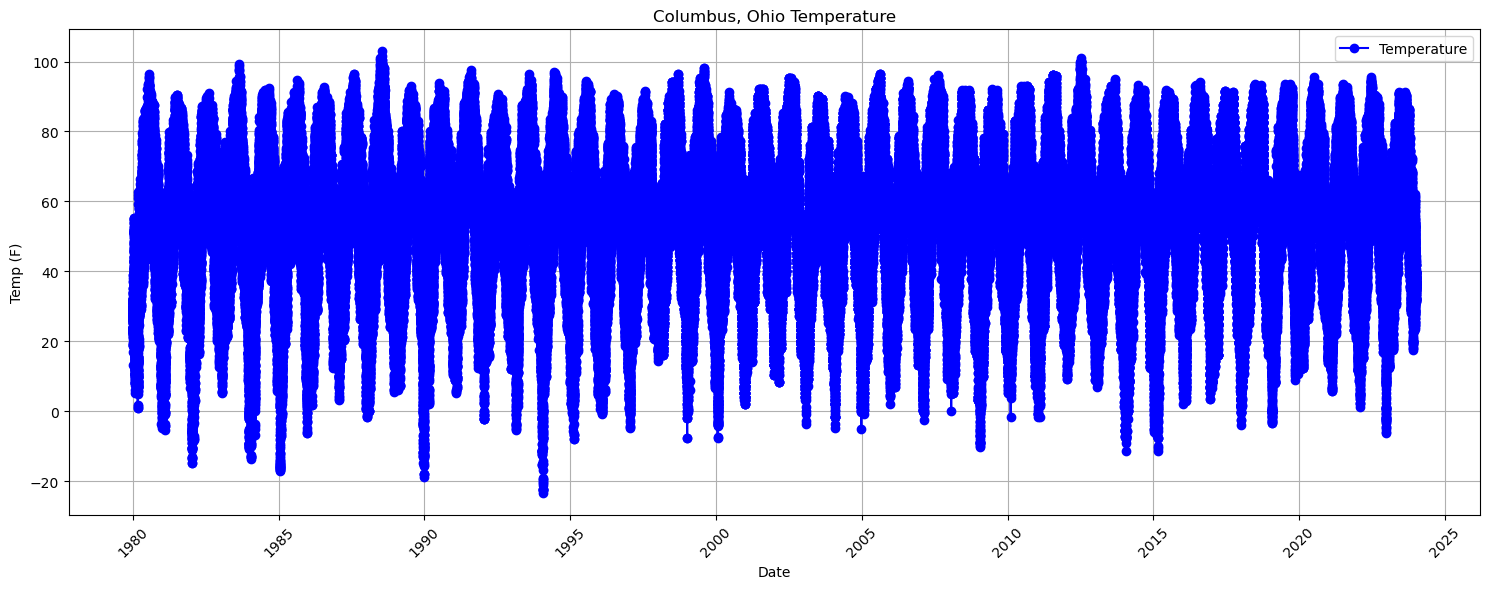

In [23]:
plt.figure(figsize=(15, 6))
plt.plot(df_columbus['temp'], marker='o', linestyle='-', color='b', label='Temperature')
plt.title('Columbus, Ohio Temperature')
plt.xlabel('Date')
plt.ylabel('Temp (F)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Read csv file as DataFrame, with the first column as row index
df_influenza = pd.read_csv("data/ohio_influenza.csv"
                )
# Preview the dataset
df_influenza.tail()

,year,week,Week Start,Week End,cuyahoga_cum,franklin_cum,hamilton_cum,cuyahoga_per_month,franklin_per_month,hamilton_per_month
185,2021,16,4/18/2021,4/24/2021,6.0,19.0,10.0,0,0,0
186,2021,17,4/25/2021,5/1/2021,6.0,19.0,10.0,0,0,0
187,2021,18,5/2/2021,5/8/2021,6.0,19.0,10.0,0,0,0
188,2021,19,5/9/2021,5/15/2021,6.0,19.0,10.0,0,0,0
189,2021,20,5/16/2021,5/22/2021,6.0,19.0,10.0,0,0,0


In [25]:
df_influenza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                190 non-null    int64  
 1   week                190 non-null    int64  
 2   Week Start          190 non-null    object 
 3   Week End            190 non-null    object 
 4   cuyahoga_cum        133 non-null    float64
 5   franklin_cum        133 non-null    float64
 6   hamilton_cum        133 non-null    float64
 7   cuyahoga_per_month  190 non-null    int64  
 8   franklin_per_month  190 non-null    int64  
 9   hamilton_per_month  190 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 15.0+ KB


In [26]:
#df_influenza['Week Start'] = df_influenza['Week Start'].dt.strftime('%Y-%m-%d')
df_influenza['Week Start'] = pd.to_datetime(df_influenza['Week Start'])
#df_influenza.set_index('Week Start',inplace=True)
df_influenza.head()

,year,week,Week Start,Week End,cuyahoga_cum,franklin_cum,hamilton_cum,cuyahoga_per_month,franklin_per_month,hamilton_per_month
0,2017,40,2017-10-01,10/7/2017,0.0,0.0,1.0,0,0,1
1,2017,41,2017-10-08,10/14/2017,0.0,1.0,1.0,0,1,0
2,2017,42,2017-10-15,10/21/2017,1.0,3.0,1.0,1,2,0
3,2017,43,2017-10-22,10/28/2017,2.0,3.0,4.0,1,0,3
4,2017,44,2017-10-29,11/4/2017,5.0,3.0,8.0,3,0,4


In [27]:
# df_columbus['year'] = df_columbus.index.year
# df_columbus['week'] = df_columbus.index.isocalendar().week
# #weekly_avg_temp = df_columbus.groupby(['year', 'week'])['temp'].mean()
# # weekly_avg_temp

# weekly_avg_temp = df_columbus.groupby(['year', 'week'])['temp'].mean().reset_index()

# # Create a function to calculate the start date of the week
# def get_week_start(year, week):
#     # The ISO year starts on the Monday of the first week with at least 4 days in the new year
#     # This translates to the first Monday of the first week that includes January 4th
#     return pd.to_datetime(f'{year}-W{int(week)-1}-1', format='%G-W%V-%u')

# # Add the start date to the DataFrame
# weekly_avg_temp['Week Start'] = weekly_avg_temp.apply(lambda row: get_week_start(int(row['year']), int(row['week'])), axis=1)


# # Display the result
# print(weekly_avg_temp)

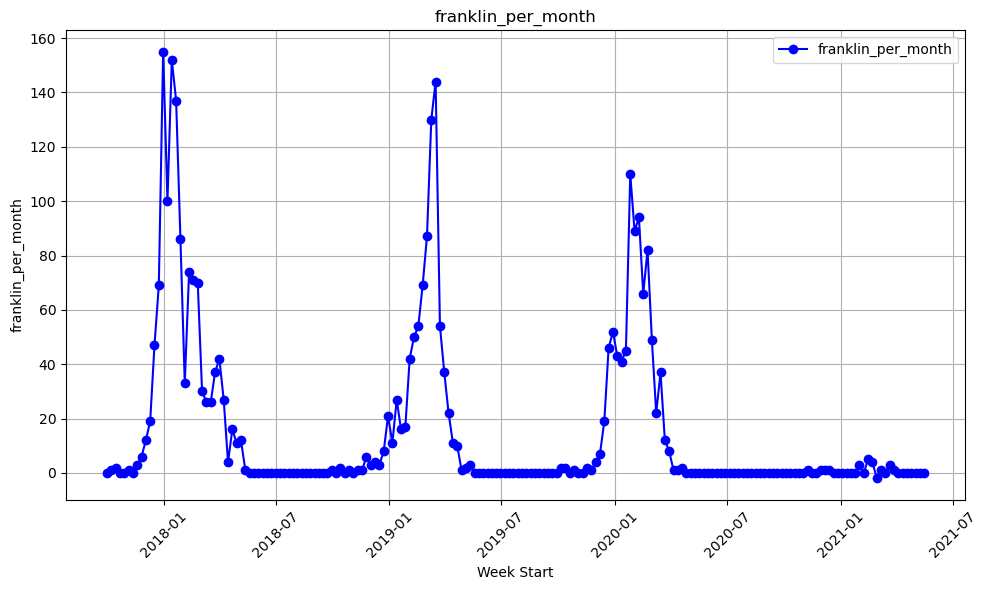

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(df_influenza['Week Start'], df_influenza['franklin_per_month'], marker='o', linestyle='-', color='b', label='franklin_per_month')
plt.xlabel('Week Start')
plt.ylabel('franklin_per_month')
plt.title('franklin_per_month')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:

# Resample by week, calculate the mean temperature
weekly_avg_temp = df_columbus['temp'].resample('W').mean()


# Reset index
weekly_avg_temp = weekly_avg_temp.reset_index()

# Rename the columns
weekly_avg_temp.columns = ['Week Start', 'Average Temp']

print(weekly_avg_temp)

                    Week Start  Average Temp
0    1980-01-06 00:00:00-05:00     28.482595
1    1980-01-13 00:00:00-05:00     30.496923
2    1980-01-20 00:00:00-05:00     38.612034
3    1980-01-27 00:00:00-05:00     27.912800
4    1980-02-03 00:00:00-05:00     16.601607
...                        ...           ...
2292 2023-12-10 00:00:00-05:00     42.378729
2293 2023-12-17 00:00:00-05:00     37.649716
2294 2023-12-24 00:00:00-05:00     39.001398
2295 2023-12-31 00:00:00-05:00     43.769175
2296 2024-01-07 00:00:00-05:00     33.660476

[2297 rows x 2 columns]


In [30]:
weekly_avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Week Start    2297 non-null   datetime64[ns, America/New_York]
 1   Average Temp  2297 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(1)
memory usage: 36.0 KB


In [31]:
weekly_avg_temp['Week Start'] = weekly_avg_temp['Week Start'].dt.tz_localize(None)

In [32]:
#weekly_avg_temp = pd.DataFrame(weekly_avg_temp)

In [33]:
weekly_avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Week Start    2297 non-null   datetime64[ns]
 1   Average Temp  2297 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 36.0 KB


In [34]:
df_influenza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                190 non-null    int64         
 1   week                190 non-null    int64         
 2   Week Start          190 non-null    datetime64[ns]
 3   Week End            190 non-null    object        
 4   cuyahoga_cum        133 non-null    float64       
 5   franklin_cum        133 non-null    float64       
 6   hamilton_cum        133 non-null    float64       
 7   cuyahoga_per_month  190 non-null    int64         
 8   franklin_per_month  190 non-null    int64         
 9   hamilton_per_month  190 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 15.0+ KB


In [35]:
weekly_avg_temp.tail()

,Week Start,Average Temp
2292,2023-12-10,42.378729
2293,2023-12-17,37.649716
2294,2023-12-24,39.001398
2295,2023-12-31,43.769175
2296,2024-01-07,33.660476


In [36]:
df_influenza.tail()

,year,week,Week Start,Week End,cuyahoga_cum,franklin_cum,hamilton_cum,cuyahoga_per_month,franklin_per_month,hamilton_per_month
185,2021,16,2021-04-18,4/24/2021,6.0,19.0,10.0,0,0,0
186,2021,17,2021-04-25,5/1/2021,6.0,19.0,10.0,0,0,0
187,2021,18,2021-05-02,5/8/2021,6.0,19.0,10.0,0,0,0
188,2021,19,2021-05-09,5/15/2021,6.0,19.0,10.0,0,0,0
189,2021,20,2021-05-16,5/22/2021,6.0,19.0,10.0,0,0,0


In [37]:
merged_df = pd.merge(weekly_avg_temp, df_influenza, on='Week Start', how='inner')
#merged_df = pd.concat([df_influenza,weekly_avg_temp], axis=1, join='inner')

In [38]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Week Start          190 non-null    datetime64[ns]
 1   Average Temp        190 non-null    float64       
 2   year                190 non-null    int64         
 3   week                190 non-null    int64         
 4   Week End            190 non-null    object        
 5   cuyahoga_cum        133 non-null    float64       
 6   franklin_cum        133 non-null    float64       
 7   hamilton_cum        133 non-null    float64       
 8   cuyahoga_per_month  190 non-null    int64         
 9   franklin_per_month  190 non-null    int64         
 10  hamilton_per_month  190 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 16.5+ KB


In [39]:
merged_df.head(10)

,Week Start,Average Temp,year,week,Week End,cuyahoga_cum,franklin_cum,hamilton_cum,cuyahoga_per_month,franklin_per_month,hamilton_per_month
0,2017-10-01,67.473929,2017,40,10/7/2017,0.0,0.0,1.0,0,0,1
1,2017-10-08,68.004358,2017,41,10/14/2017,0.0,1.0,1.0,0,1,0
2,2017-10-15,66.508407,2017,42,10/21/2017,1.0,3.0,1.0,1,2,0
3,2017-10-22,57.868690,2017,43,10/28/2017,2.0,3.0,4.0,1,0,3
4,2017-10-29,48.365587,2017,44,11/4/2017,5.0,3.0,8.0,3,0,4
5,2017-11-05,50.559529,2017,45,11/11/2017,8.0,4.0,8.0,3,1,0
6,2017-11-12,40.345198,2017,46,11/18/2017,12.0,4.0,8.0,4,0,0
7,2017-11-19,42.325414,2017,47,11/25/2017,14.0,7.0,8.0,2,3,0
8,2017-11-26,39.200000,2017,48,12/2/2017,28.0,13.0,13.0,14,6,5
9,2017-12-03,43.511775,2017,49,12/9/2017,39.0,25.0,15.0,11,12,2


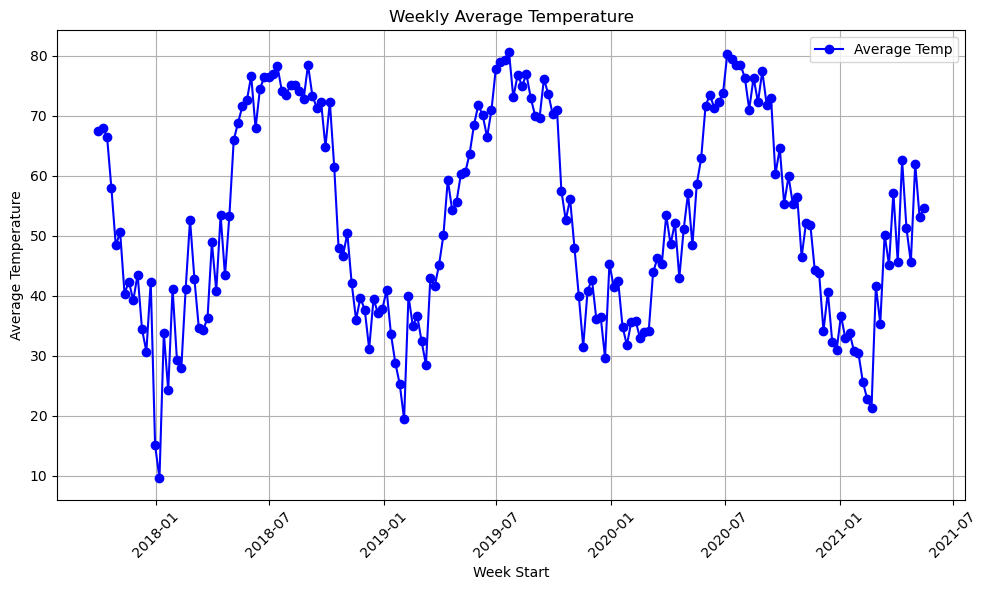

In [40]:
# Plot Week Start by Average Temp
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Week Start'], merged_df['Average Temp'], marker='o', linestyle='-', color='b', label='Average Temp')
plt.xlabel('Week Start')
plt.ylabel('Average Temperature')
plt.title('Weekly Average Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

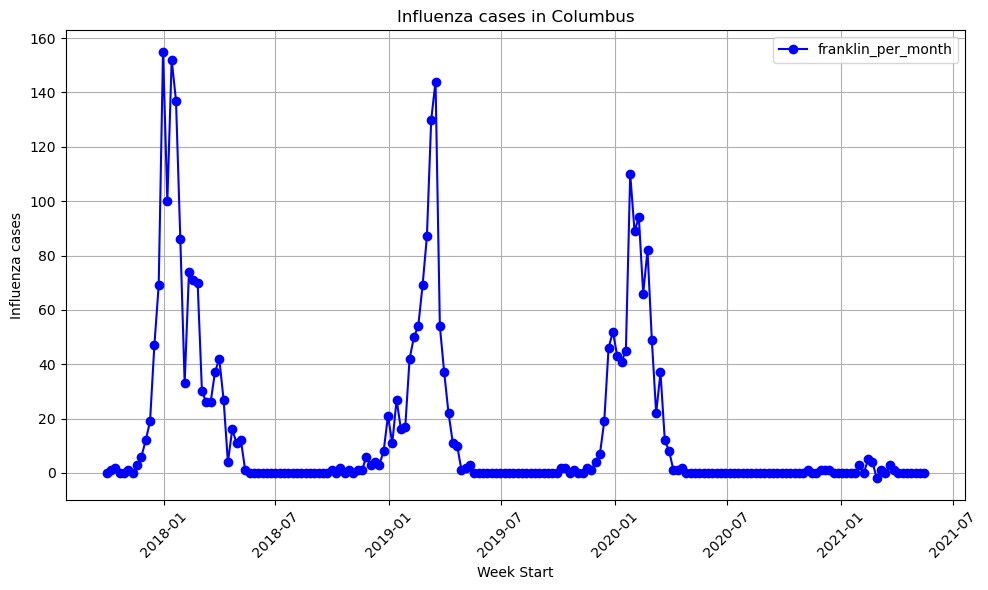

In [41]:
# Plot Week Start by franklin_per_month
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Week Start'], merged_df['franklin_per_month'], marker='o', linestyle='-', color='b', label='franklin_per_month')
plt.xlabel('Week Start')
plt.ylabel('Influenza cases')
plt.title('Influenza cases in Columbus')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
merged_df_filtered = merged_df[merged_df['Weekly Start'] < '2020-07-01']

KeyError: 'Weekly Start'

In [120]:
merged_df['Average Temp'].corr(merged_df['franklin_per_month'])

-0.4981438281089464